In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [3]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
#on rassemble tous les datasets
data_1 = pd.read_csv("data1.csv")
for dataseti in range(2,16):
    data_1 = pd.concat([data_1,  pd.read_csv("data"+str(dataseti)+".csv")],ignore_index = True)

In [5]:
len(data_1)

78377

In [6]:
##
##
##
## description du dataset 
##
##
## 

In [7]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [9]:
print(pd.Series(data_1['marker']).value_counts())

Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64


In [10]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})

In [11]:
data_1.isnull().values.any()#nan values ?

False

In [12]:
data_1.isnull().any().any()

False

In [13]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [14]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [15]:
rows_with_infini[rows_with_infini['marker']==1].count()
# il y a des valeurs infinies

R1-PA1:VH     2086
R1-PM1:V      2086
R1-PA2:VH     2086
R1-PM2:V      2086
R1-PA3:VH     2086
              ... 
snort_log1    2086
snort_log2    2086
snort_log3    2086
snort_log4    2086
marker        2086
Length: 129, dtype: int64

In [16]:

#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [17]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [18]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [19]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [22]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [23]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.695555,0.842210,0.362295,0.842184,0.028936,0.841983,0.682477,0.340502,0.341652,0.495226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.704691,0.859411,0.371383,0.859388,0.038103,0.859339,0.699538,0.271764,0.358475,0.395833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.704818,0.859577,0.371510,0.859553,0.038231,0.859504,0.699475,0.271764,0.358571,0.395833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705789,0.861396,0.372497,0.861373,0.039202,0.861322,0.700430,0.271352,0.359892,0.394387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707094,0.864704,0.373818,0.864682,0.040475,0.864628,0.700334,0.272278,0.361070,0.393229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.893314,0.869997,0.560019,0.869975,0.226711,0.869917,0.898201,0.173904,0.561547,0.248987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78373,0.893139,0.870493,0.559908,0.870306,0.226551,0.870248,0.897262,0.174419,0.560879,0.249277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78374,0.892693,0.870989,0.559430,0.870802,0.226074,0.870744,0.894318,0.176065,0.559016,0.250579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78375,0.892645,0.870989,0.559367,0.870802,0.226058,0.870909,0.893984,0.175962,0.558873,0.250868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#on prépare le dataset FeatureSelection

In [24]:
######################### feature selection

In [25]:
from sklearn.feature_selection import SelectPercentile, chi2
len(data_1)

78377

In [26]:
newDF =  pd.concat([pd.DataFrame(SelectPercentile(chi2, percentile=80).fit_transform(data_1.drop(['marker'],axis=1), data_1['marker'])),data_1['marker']],axis=1)

In [27]:
len(newDF)

78377

In [28]:
data_1 = newDF.copy()

In [29]:
data_1

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,marker
0,0.695555,0.842210,0.362295,0.028936,0.682477,0.340502,0.341652,0.495226,0.017794,0.476812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.704691,0.859411,0.371383,0.038103,0.699538,0.271764,0.358475,0.395833,0.034745,0.381014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.704818,0.859577,0.371510,0.038231,0.699475,0.271764,0.358571,0.395833,0.034872,0.380725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705789,0.861396,0.372497,0.039202,0.700430,0.271352,0.359892,0.394387,0.035302,0.381014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707094,0.864704,0.373818,0.040475,0.700334,0.272278,0.361070,0.393229,0.034808,0.383623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.893314,0.869997,0.560019,0.226711,0.898201,0.173904,0.561547,0.248987,0.230766,0.245942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78373,0.893139,0.870493,0.559908,0.226551,0.897262,0.174419,0.560879,0.249277,0.229715,0.246812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78374,0.892693,0.870989,0.559430,0.226074,0.894318,0.176065,0.559016,0.250579,0.227455,0.248406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78375,0.892645,0.870989,0.559367,0.226058,0.893984,0.175962,0.558873,0.250868,0.227296,0.248551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
########################## test classifiers sur données FeatureSelection

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [32]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [33]:
## decision tree

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [35]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8598222260026368

In [36]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1127,    35,   123],
       [   29,  3959,  1479],
       [  121,  1509, 15131]])

In [37]:
## random forest

In [38]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9170246246757113

In [39]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1194,     7,    84],
       [    8,  3986,  1473],
       [    9,   370, 16382]])

In [40]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.95673077, 0.81098678, 0.94420749])

Text(0.5, 1.0, 'importance de la feature')

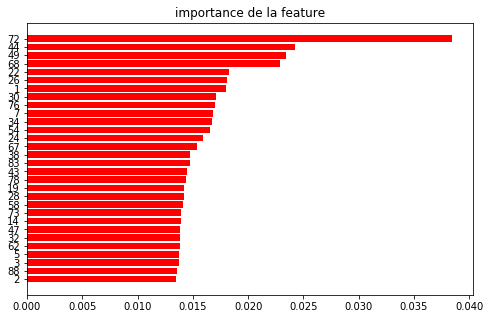

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('olm', KNeighborsClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8795985199676775

In [43]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.89208075, 0.71675432, 0.92186833])

In [44]:
########## autres

In [45]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.841024114319738

In [46]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.1107897758686684

In [47]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8551014332496917

In [48]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.930251350316846

In [49]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.94198227, 0.85248763, 0.9528233 ])

In [50]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9288478713902947

In [51]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8249053714966189

In [52]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.91104051, 0.49839682, 0.88834409])

In [ ]:
#Feature selection marche moins bien